## COVID-19 Data Analysis (2020): Lessons from Global Response Patterns

**POV: A Data Researcher in 2020-2021**

Who aims to understand the progression of COVID-19 across countries, identify which nations are responding effectively, and extract actionable insights that could guide future pandemic responses.

As COVID-19 swept across the globe in early 2020, it left behind not only a trail of disruption and loss—but also a treasure trove of data. In this notebook, we use early pandemic data to answer critical, forward-looking questions:

* **What we can learn from countries like China, South Korea and Italy - the most impacted countries?**
* **Which countries were witnessing rapid surges? How early intervention affects case trends?**
* **What can other countries learn to better deal with the pandemic?**

Focus of this notebook:
* **Learn from countries that reacted early and strongly (China, South Korea)**

* **Understand what happened in large nations where the virus arrived later (India, USA)**


* **Use simple and clear visualizations with Plotly's Bar and Scatter charts**

# Part 1: Early Epicenters – Lessons from China, Italy, and South Korea

Let's start with importing required dataset and verifying columns

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objs as go #for creating interactive graphs
from plotly.subplots import make_subplots
from datetime import datetime # for date time columns

In [2]:
#Import main data set
df=pd.read_csv('Data_COVID19.csv')
print("Importing the data set and verifying the columns")

#Converting date column into correct format
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])

#Geting latest timestamp
latest_timestamp=df.iloc[df.last_valid_index()]['ObservationDate']
#Geting latest date
latest_date=latest_timestamp.strftime("%Y-%m-%d")
print("Data available till {}".format(latest_date))

#Checking Columns in data set
df.head()

Importing the data set and verifying the columns
Data available till 2021-02-27


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0


One more column is added here, **Active Cases** (**Confirmed Cases-Recovered-Deaths**) 

In [3]:
#Adding Active cases
df['ActiveCases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
print("Active Cases Column Added Successfully")
df.head()

Active Cases Column Added Successfully


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0


**1.1. China - the initial epicenter of the COVID19: Strict and early lockdown works** 

Our goal is to understand how strongly the virus spread over time and identify key patterns in the early stages of the pandemic.

Since the dataset includes cases reported across various provinces in China, we group the data by the 'Observation Date' and create a new column labeled 'Week'. This allows us to track and visualize the weekly progression of the outbreak, making it easier to identify turning points and shifts in the transmission trend.

In [4]:
#Taking out of data for China region
df_china=df[df['Country/Region'] == 'Mainland China']
print("Number of Records for China are {}".format(df_china.shape))
df_china.head()

Number of Records for China are (12500, 9)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0


In [5]:
#Group by date and sum the numeric columns
df_china = df_china.groupby(['ObservationDate'], as_index=False).sum()
print("Grouped by Observation Date")

#Add the 'Week' column using the isocalendar method
df_china['Week'] = df_china['ObservationDate'].dt.isocalendar().week
print("Week Column Added successfully")
df_china = df_china.drop(columns=['Province/State', 'Country/Region','Last Update'], errors='ignore')
df_china.head()

Grouped by Observation Date
Week Column Added successfully


,ObservationDate,SNo,Confirmed,Deaths,Recovered,ActiveCases,Week
0,2020-01-22,535,547,17,28,502,4
1,2020-01-23,1713,1082,34,58,990,4
2,2020-01-24,3004,916,26,36,854,4
3,2020-01-25,4224,1399,42,39,1318,4
4,2020-01-26,5548,2062,56,49,1957,4


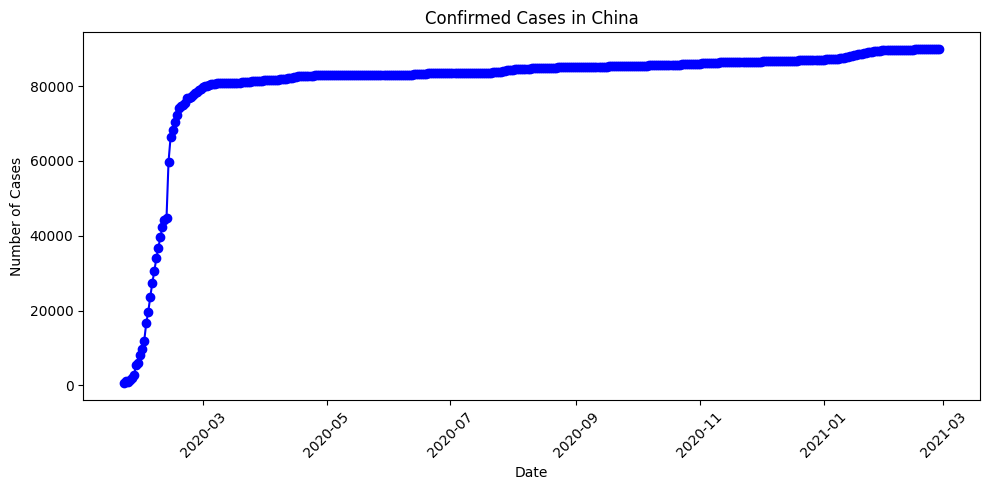

In [7]:
import matplotlib.pyplot as plt
#Visualizing Number of Confirmed cases , Deaths and Recovery in China
df_china['ObservationDate'] = pd.to_datetime(df_china['ObservationDate'])
plt.figure(figsize=(10, 5))
plt.plot(df_china['ObservationDate'], df_china['Confirmed'], color='blue', marker='o')
plt.title('Confirmed Cases in China')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


China's Trend Visualization: Individual trend

In [8]:
#Visualizing Number of Confirmed cases , Deaths and Recovery in China
fig1=px.line(df_china,x='ObservationDate',y='Confirmed',title='Confirmed Cases in China')
fig2=px.line(df_china,x='ObservationDate',y='Deaths',title='Deaths in China')
fig3=px.line(df_china,x='ObservationDate',y='Recovered',title='Recovery in China')
fig4=px.line(df_china,x='ObservationDate',y='ActiveCases',title='Active Cases in China')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

1. Confirmed Cases
* The number of confirmed cases in China increased rapidly from late January to late February - reflecting the initial outbreak phase of COVID-19 in Wuhan and surrounding provinces
* Afterwards began to slow down (though still maintained an upward trend)
* It might indicate that control measures had started to become effective.

2. Deaths 
* The number of deaths rose alongside confirmed cases but at a much slower rate.
* There was a sudden spike in the Number of Deaths in the month of April - these numbers are the missing ones which were not reported initially
* The number of deaths rose early on but remained relatively low and stable after April 2020, indicating that fatality rates were managed effectively.

3. Recovered Cases
* The number of recovered cases began to increase rapidly around the first few months after the peak of the outbreak.
* This steep increase reflects the aggressive public health response, large-scale quarantines, and early containment efforts deployed by the government.
* After that, the number of recoveries continued to grow slowly and steadily, suggesting that the virus was largely under control, with only sporadic cases emerging.

4. Active Cases
* The number of active cases peaked in early February and then gradually declined. This steep decline shows that recoveries outpaced new infections, a sign that China was able to control the spread and transition toward a recovery phase.
* This indicates that China was gradually bringing the outbreak under control, moving from a crisis phase to stabilization and recovery.

Let's visualize this in 1 single graph for comparision

In [ ]:
#Visualizing Cumaltive trends
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['ObservationDate'], y=df_china['Confirmed'],
                    mode='lines',name=' Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_china['ObservationDate'], y=df_china['Deaths'], 
                mode='lines',name='Deaths'))
fig.add_trace(go.Scatter(x=df_china['ObservationDate'], y=df_china['Recovered'], 
                mode='lines',name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_china['ObservationDate'], y=df_china['ActiveCases'], 
                mode='lines',name='Active Cases'))

        
    
fig.update_layout(title_text='Trend in China',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [ ]:
#Getting the latest observation date from data set
df.iloc[df.last_valid_index()]['ObservationDate']
#Taking out record for latest records in seprate data frame
df_china_lately=df_china[df_china['ObservationDate'] == latest_date]
#Creating temporary data frame for visualizing purpose
df_china_status=pd.DataFrame(columns=['Numbers','Status'])
#Appending Records from latest data frame
df_china_status = pd.DataFrame([
    {'Numbers': df_china_lately.iloc[0]['Confirmed'], 'Status': 'Confirmed'},
    {'Numbers': df_china_lately.iloc[0]['ActiveCases'], 'Status': 'Active Cases'},
    {'Numbers': df_china_lately.iloc[0]['Recovered'], 'Status': 'Recovered'},
    {'Numbers': df_china_lately.iloc[0]['Deaths'], 'Status': 'Deaths'}
])
#Visualizing graphs
fig = px.bar(df_china_status, y='Numbers', x='Status',title='Latest Status in China' , color='Numbers')
fig.show()

**📌Take-away points**

In summary, the chart reflects a country that managed to contain the outbreak early, maintain a low number of deaths, and reduce active cases over time. 

These results, alongside with the measures taken during this period: Wuhan Lockdown, Social Distancing and Trial Rollout of Vaccines... - have offered important insights for crisis management in pandemics.

In [ ]:
#Calculating Death,Active Cases and Recovery percentage
death_percentage=round((df_china_lately.iloc[0]['Deaths']/df_china_lately.iloc[0]['Confirmed'])*100)
active_cases_percentage=round((df_china_lately.iloc[0]['ActiveCases']/df_china_lately.iloc[0]['Confirmed'])*100)
recovery_percentage=round((df_china_lately.iloc[0]['Recovered']/df_china_lately.iloc[0]['Confirmed'])*100)

print("In China Active Cases and Recovery percentage is {}, {} respectively and Death rate is {} ".format(active_cases_percentage,recovery_percentage,death_percentage))

In China Active Cases and Recovery percentage is 0, 95 respectively and Death rate is 5 


This represents a remarkable comeback for China.

**1.2. Italy: Reaction time is critical**

In [ ]:
#Taking out of data for Italy region
df_italy=df[df['Country/Region'] == 'Italy']
print("Number of Records for Italy are {}".format(df_italy.shape))
df_italy.head()

Number of Records for Italy are (6194, 9)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
480,481,2020-01-31,NaN,Italy,1/31/2020 23:59,2,0,0,2
539,540,2020-02-01,NaN,Italy,1/31/2020 8:15,2,0,0,2
608,609,2020-02-02,NaN,Italy,2020-01-31T08:15:53,2,0,0,2
675,676,2020-02-03,NaN,Italy,2020-01-31T08:15:53,2,0,0,2
743,744,2020-02-04,NaN,Italy,2020-01-31T08:15:53,2,0,0,2


Italy's Trend Visualization: Individual trend

In [ ]:
#Group by date
df_italy=df_italy.groupby(['ObservationDate']).sum().reset_index()
df_italy['Week'] = df_italy['ObservationDate'].dt.isocalendar().week
df_italy.head()
#Visualizing Number of Confirmed cases , Deaths and Recovery in italy
fig1=px.line(df_italy,x='ObservationDate',y='Confirmed',title='Confirmed Cases in Italy')
fig2=px.line(df_italy,x='ObservationDate',y='Deaths',title='Deaths in Italy')
fig3=px.line(df_italy,x='ObservationDate',y='Recovered',title='Recovery in Italy')
fig4=px.line(df_italy,x='ObservationDate',y='ActiveCases',title='Active Cases in Italy')
fig1.show()
fig2.show()
fig3.show()
fig4.show()

1. Confirmed Cases
* COVID-19 cases in Italy increased slowly during the first half of 2020 but surged rapidly starting from October 2020, surpassing 2 million cases by early 2021.

2. Deaths 
* The graph indicates a sharp rise in COVID-19-related deaths in Italy around March–May 2020, followed by a relatively stable phase during the summer.
* However, from October 2020 onwards, there was another significant spike, with total deaths approaching 100,000 by early 2021.

3. Recovered Cases
* The chart shows a gradual increase in recovered cases from March to around October 2020.
* A significant surge in recoveries began around November 2020, continuing into early 2021, reaching over 2.4 million by that time.
* May be due to improved treatment protocols and healthcare response over time.

4. Active Cases
* There was a sharp increase starting around October 2020, peaking in November 2020.
* After the peak, active cases declined gradually in early 2021, thanks to strict lockdowns and recoveries.

In [ ]:
#Visualizing Cumaltive trends
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_italy['ObservationDate'], y=df_italy['Confirmed'],
                    mode='lines',name=' Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_italy['ObservationDate'], y=df_italy['Deaths'], 
                mode='lines',name='Deaths'))
fig.add_trace(go.Scatter(x=df_italy['ObservationDate'], y=df_italy['Recovered'], 
                mode='lines',name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_italy['ObservationDate'], y=df_italy['ActiveCases'], 
                mode='lines',name='Active Cases'))

        
    
fig.update_layout(title_text='Trend in Italy',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [ ]:
#Taking out record for latest records in seprate df
df_italy_lately=df_italy[df_italy['ObservationDate'] == latest_date]
#Creating temporary data frame for visualizing purpose
df_italy_status=pd.DataFrame(columns=['Numbers','Status'])
#Appending Records from latest data frame
df_italy_status = pd.DataFrame([
    {'Numbers': df_italy_lately.iloc[0]['Confirmed'], 'Status': 'Confirmed'},
    {'Numbers': df_italy_lately.iloc[0]['ActiveCases'], 'Status': 'Active Cases'},
    {'Numbers': df_italy_lately.iloc[0]['Recovered'], 'Status': 'Recovered'},
    {'Numbers': df_italy_lately.iloc[0]['Deaths'], 'Status': 'Deaths'}
])
#Visualizing graphs
fig = px.bar(df_italy_status, y='Numbers', x='Status',title='Latest Status in Italy' , color='Numbers')
fig.show()

**📌Take-away points**

* Rate by which confirmed cases increasing is higher than the rate of recovery and deaths - which is not in the case of China
* The graphs reflect two clear phases: an initial outbreak in early 2020, some control mid-year and then a major resurgence in late 2020.
* The resurgence of COVID-19 in Italy can be attributed to the eased restrictions, reopening of school in September 2020...

In [ ]:
#Calculating Death,Active Cases and Recovery percentage
death_percentage=round((df_italy_lately.iloc[0]['Deaths']/df_italy_lately.iloc[0]['Confirmed'])*100)
active_cases_percentage=round((df_italy_lately.iloc[0]['ActiveCases']/df_italy_lately.iloc[0]['Confirmed'])*100)
recovery_percentage=round((df_italy_lately.iloc[0]['Recovered']/df_italy_lately.iloc[0]['Confirmed'])*100)

print("In Italy Active Cases and Recovery percentage is {}, {} respectively and Death rate is {} ".format(active_cases_percentage,recovery_percentage,death_percentage))

In Italy Active Cases and Recovery percentage is 14, 82 respectively and Death rate is 3 


During the period, the situation in Italy remained concerning, with a relatively low recovery rate and a continuous rise in the number of deaths. However, the response from the government had already showed signs of improvement.

**1.3. South Korea: Open Society - Tight Control - No lockdown but still successful**

In [ ]:
#Taking out of data for SouthKorea region
df_SouthKorea=df[df['Country/Region'] == 'South Korea']
print("Number of Records for SouthKorea are {}".format(df_SouthKorea.shape))
df_SouthKorea.head()

Number of Records for SouthKorea are (403, 9)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
37,38,2020-01-22,NaN,South Korea,1/22/2020 17:00,1,0,0,1
75,76,2020-01-23,NaN,South Korea,1/23/2020 17:00,1,0,0,1
121,122,2020-01-24,NaN,South Korea,1/24/2020 17:00,2,0,0,2
162,163,2020-01-25,NaN,South Korea,1/25/2020 17:00,2,0,0,2
208,209,2020-01-26,NaN,South Korea,1/26/2020 16:00,3,0,0,3


South Korea's Trend Visualization: Individual Trend

In [ ]:
#Group by date
df_SouthKorea=df_SouthKorea.groupby(['ObservationDate']).sum().reset_index()
df_SouthKorea['Week'] = df_SouthKorea['ObservationDate'].dt.isocalendar().week

df_SouthKorea.head()
#Visualizing Number of Confirmed cases , Deaths and Recovery in SouthKorea
fig1=px.line(df_SouthKorea,x='ObservationDate',y='Confirmed',title='Confirmed Cases in South Korea')
fig2=px.line(df_SouthKorea,x='ObservationDate',y='Deaths',title='Deaths in South Korea')
fig3=px.line(df_SouthKorea,x='ObservationDate',y='Recovered',title='Recovery in South Korea')
fig4=px.line(df_SouthKorea,x='ObservationDate',y='ActiveCases',title='Active Cases in South Korea')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

1. Confirmed Cases
* Confirmed cases have increased from **31** to **602** (20 times) with in 5 days i.e between Feburary 19 and Feburary 24. This may be because of **Patient31** of South Korea (refer this [article](https://graphics.reuters.com/CHINA-HEALTH-SOUTHKOREA-CLUSTERS/0100B5G33SB/index.html) to read about Patient31)
* The number of confirmed cases increased slowly during the first half of 2020.
* However, there was a noticeable surge starting around November 2020, continuing into early 2021.

👉 This indicates that South Korea maintained strong control in the early stages, but faced a significant wave of infections at the end of the year.

2. Deaths 
* The death count increased slowly and remained significantly lower than the confirmed cases.

👉 This indicates low mortality and a well-functioning healthcare system.

3. Recovered Cases
* The recovered cases closely follow the trend of confirmed cases (almost parallel), suggesting a high recovery rate.
* The steep increase in recoveries in late 2020 and early 2021 helped reduce the number of active cases.

4. Active Cases
* There was an early peak around March–April 2020, followed by a steep decline.
* By early 2021, after minor spikes, active cases began to decline again, showing signs of control.

👉 This reflects effective testing, contact tracing, and isolation measures throughout the year.


In [ ]:
#Visualizing Cumaltive trends
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_SouthKorea['ObservationDate'], y=df_SouthKorea['Confirmed'],
                    mode='lines',name=' Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_SouthKorea['ObservationDate'], y=df_SouthKorea['Deaths'], 
                mode='lines',name='Deaths'))
fig.add_trace(go.Scatter(x=df_SouthKorea['ObservationDate'], y=df_SouthKorea['Recovered'], 
                mode='lines',name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_SouthKorea['ObservationDate'], y=df_SouthKorea['ActiveCases'], 
                mode='lines',name='Active Cases'))

        
    
fig.update_layout(title_text='Trend in South Korea',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [ ]:
#Taking out latest records in seprate df
df_SouthKorea_lately=df_SouthKorea[df_SouthKorea['ObservationDate'] == latest_date]
#Creating temporary data frame for visualizing purpose
df_sk_status=pd.DataFrame(columns=['Numbers','Status'])
#Appending Records from latest data frame
df_sk_status = pd.DataFrame([
    {'Numbers': df_SouthKorea_lately.iloc[0]['Confirmed'], 'Status': 'Confirmed'},
    {'Numbers': df_SouthKorea_lately.iloc[0]['ActiveCases'], 'Status': 'Active Cases'},
    {'Numbers': df_SouthKorea_lately.iloc[0]['Recovered'], 'Status': 'Recovered'},
    {'Numbers': df_SouthKorea_lately.iloc[0]['Deaths'], 'Status': 'Deaths'}
])
#Visualizing graphs
fig = px.bar(df_sk_status, y='Numbers', x='Status',title='Latest Status in South Korea' , color='Numbers')
fig.show()

**📌Take-away points**

* South Korea managed the pandemic remarkably well for most of 2020, keeping infection and death numbers relatively low.
* Although a larger outbreak occurred in late 2020, the situation did not spiral out of control thanks to swift public health responses: Mass testing, Digital tracking, Contact Tracing, School Lockdown...
* By early 2021, the number of active cases was already declining, supported by high recovery rates and low fatalities — a sign of an improving and stable trend.

In [ ]:
#Calculating Death,Active Cases and Recovery percentage
death_percentage=round((df_SouthKorea_lately.iloc[0]['Deaths']/df_SouthKorea_lately.iloc[0]['Confirmed'])*100)
active_cases_percentage=round((df_SouthKorea_lately.iloc[0]['ActiveCases']/df_SouthKorea_lately.iloc[0]['Confirmed'])*100)
recovery_percentage=round((df_SouthKorea_lately.iloc[0]['Recovered']/df_SouthKorea_lately.iloc[0]['Confirmed'])*100)

print("In South Korea Active Cases and Recovery percentage is {}, {} respectively and Death rate is {} ".format(active_cases_percentage,recovery_percentage,death_percentage))

In South Korea Active Cases and Recovery percentage is 8, 90 respectively and Death rate is 2 


Like China, South Korea also did a commendable job in controlling the pandemic, as reflected in its low death rate. However, the number of active cases remained relatively high (close to **60%** at one point) . Still, unlike Italy, despite sudden surge in cases, South Korea managed to efficiently handle the situation.

> >Key Indicators for Managing the Pandemic Effectively:
> * Rate of Confirmed Cases should not rise drastically.
> * Rate of Deaths should reamain low.
> * Rate of Active cases should gradually decrease.
> * Rate of Recovery should steadily increase.
> 
> **It's evident from above graphs that both China and South Korea have met these criteria. Others should aim to follow similar trends to effectively combat COVID-19.**

## Part 2: Delayed Epicenters - USA and India

**2.1. USA: Loose policy caused rapid spread**

In [ ]:
#Taking out of data for USA region
df_USA=df[df['Country/Region'] == 'US']
print("Number of Records for USA are {}".format(df_USA.shape))
df_USA.head()

Number of Records for USA are (21462, 9)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1,0,0,1
69,70,2020-01-23,Washington,US,1/23/2020 17:00,1,0,0,1
117,118,2020-01-24,Washington,US,1/24/2020 17:00,1,0,0,1
118,119,2020-01-24,Chicago,US,1/24/2020 17:00,1,0,0,1
158,159,2020-01-25,Washington,US,1/25/2020 17:00,1,0,0,1


USA's Trend Visualization: Individual Trend

In [ ]:
#Group by date
df_USA=df_USA.groupby(['ObservationDate']).sum().reset_index()
df_USA['Week'] = df_USA['ObservationDate'].dt.isocalendar().week

df_USA.head()
#Visualizing Number of Confirmed cases , Deaths and Recovery in USA
fig1=px.line(df_USA,x='ObservationDate',y='Confirmed',title='Confirmed Cases in USA')
fig2=px.line(df_USA,x='ObservationDate',y='Deaths',title='Deaths in USA')
fig3=px.line(df_USA,x='ObservationDate',y='Recovered',title='Recovery in USA')
fig4=px.line(df_USA,x='ObservationDate',y='ActiveCases',title='Active Cases in USA')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

> Note: Some data regarding the number of deaths and active cases at late 2020 - ealy 2021 were missing.

1. Confirmed Cases
* The number of confirmed cases shows a steep and continuous rise, especially from October 2020 onwards.
* By early 2021, the total number surpassed 27 million, indicating one of the highest case counts globally.

👉 This indicates widespread transmission and limited early containment. Also, Rapid acceleration from October suggests a major outbreak wave during winter.


2. Deaths 
* The number of deaths gradually increases throughout the year, recorded hundred thousands of deaths.

👉 Implies persistent mortality over time, though the slope is much less steep than confirmed cases.

3. Recovered Cases
* Gradually rose overtime, but far below total cases

4. Active Cases
* Closely follows the trend of confirmed cases, showing a very high number of active cases, especially during the last few months of 2020.

👉 Suggests that a large portion of cases remained unresolved (neither recovered nor dead).


In [ ]:
#Visualizing Cumaltive trends
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_USA['ObservationDate'], y=df_USA['Confirmed'],
                    mode='lines',name=' Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_USA['ObservationDate'], y=df_USA['Deaths'], 
                mode='lines',name='Deaths'))
fig.add_trace(go.Scatter(x=df_USA['ObservationDate'], y=df_USA['Recovered'], 
                mode='lines',name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_USA['ObservationDate'], y=df_USA['ActiveCases'], 
                mode='lines',name='Active Cases'))

        
    
fig.update_layout(title_text='Trend in USA',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [ ]:
#Taking out latest records in seprate df
df_USA_lately=df_USA[df_USA['ObservationDate'] == latest_date]
#Creating temporary data frame for visualizing purpose
df_usa_status=pd.DataFrame(columns=['Numbers','Status'])
#Appending Records from latest data frame
df_usa_status = pd.DataFrame([
    {'Numbers': df_USA_lately.iloc[0]['Confirmed'], 'Status': 'Confirmed'},
    {'Numbers': df_USA_lately.iloc[0]['ActiveCases'], 'Status': 'Active Cases'},
    {'Numbers': df_USA_lately.iloc[0]['Recovered'], 'Status': 'Recovered'},
    {'Numbers': df_USA_lately.iloc[0]['Deaths'], 'Status': 'Deaths'}
])
#Visualizing graphs
fig = px.bar(df_usa_status, y='Numbers', x='Status',title='Latest Status in USA' , color='Numbers')
fig.show()

**📌Take away points**

* There is huge surge in confirmed cases in US after March 10 , cases rises from **267** to **15,793** in 12 days (10 March-22 March).
* The imbalance between confirmed and recovered numbers led to high active case load, overwhelming healthcare systems. 
* Majority of cases are still active.
*  Indicates the need for more effective data handling, public health communication, and containment strategies. Recently, US Government has yet to launch a strict prevention campaign to deal with the situation. 
* Decentralized response and lack of nationwide lockdown can worsen the situation.


In [ ]:
#Calculating Death,Active Cases and Recovery percentage
death_percentage=round((df_USA_lately.iloc[0]['Deaths']/df_USA_lately.iloc[0]['Confirmed'])*100)
active_cases_percentage=round((df_USA_lately.iloc[0]['ActiveCases']/df_USA_lately.iloc[0]['Confirmed'])*100)
recovery_percentage=round((df_USA_lately.iloc[0]['Recovered']/df_USA_lately.iloc[0]['Confirmed'])*100)

print("In US Active Cases and Recovery percentage is {}, {} respectively and Death rate is {} ".format(active_cases_percentage,recovery_percentage,death_percentage))

In US Active Cases and Recovery percentage is 98, 0 respectively and Death rate is 2 


The death rate currently appears relatively low compared with the cases. However, with a significant number of active cases, the death toll in the USA could increase.

**2.2. India: A real opportunity - only if it took timely action**

In [ ]:
#Taking out of data for India region
df_India=df[df['Country/Region'] == 'India']
print("Number of Records for India are {}".format(df_India.shape))
df_India.head()

Number of Records for India are (9815, 9)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
430,431,2020-01-30,NaN,India,1/30/2020 16:00,1,0,0,1
491,492,2020-01-31,NaN,India,1/31/2020 23:59,1,0,0,1
547,548,2020-02-01,NaN,India,1/31/2020 8:15,1,0,0,1
607,608,2020-02-02,NaN,India,2020-02-02T06:03:08,2,0,0,2
672,673,2020-02-03,NaN,India,2020-02-03T21:43:02,3,0,0,3


India's Trend Visualiation: Individual Trend

In [ ]:
#Group by date
df_India=df_India.groupby(['ObservationDate']).sum().reset_index()
df_India['Week'] = df_India['ObservationDate'].dt.isocalendar().week

df_India.head()
#Visualizing Number of Confirmed cases , Deaths and Recovery in India
fig1=px.line(df_India,x='ObservationDate',y='Confirmed',title='Confirmed Cases in India')
fig2=px.line(df_India,x='ObservationDate',y='Deaths',title='Deaths in India')
fig3=px.line(df_India,x='ObservationDate',y='Recovered',title='Recovery in India')
fig4=px.line(df_India,x='ObservationDate',y='ActiveCases',title='Active Cases in India')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

1. Confirmed Cases
* The number of confirmed COVID-19 cases started rising sharply around June 2020, showing exponential growth until about October 2020, then continued increasing at a slower rate.

👉 The sharp rise suggests widespread community transmission and possibly ramped-up testing capacity during that period.

2. Deaths 
* The number of deaths increased steadily but remained significantly lower compared to confirmed and recovered cases.

👉 The low death rate suggests that most cases were either mild or treated effectively.

3. Recovered Cases
* The number of recovered cases also rose significantly, almost parallel to confirmed cases, and by early 2021, it nearly matched the total confirmed cases.

4. Active Cases
* Active cases peaked around September–October 2020 and then began to decline steadily through early 2021.

👉 The decline reflects increasing recoveries and possibly fewer new infections due to better control measures.


In [ ]:
#Visualizing Cumaltive trends
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_India['ObservationDate'], y=df_India['Confirmed'],
                    mode='lines',name=' Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_India['ObservationDate'], y=df_India['Deaths'], 
                mode='lines',name='Deaths'))
fig.add_trace(go.Scatter(x=df_India['ObservationDate'], y=df_India['Recovered'], 
                mode='lines',name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_India['ObservationDate'], y=df_India['ActiveCases'], 
                mode='lines',name='Active Cases'))

fig.update_layout(title_text='Trend in India',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [ ]:
#Taking out latest records in seprate df
df_India_lately=df_India[df_India['ObservationDate'] == latest_date]
#Creating temporary data frame for visualizing purpose
df_India_status=pd.DataFrame(columns=['Numbers','Status'])
#Appending Records from latest data frame
df_India_status = pd.DataFrame([
    {'Numbers': df_India_lately.iloc[0]['Confirmed'], 'Status': 'Confirmed'},
    {'Numbers': df_India_lately.iloc[0]['ActiveCases'], 'Status': 'Active Cases'},
    {'Numbers': df_India_lately.iloc[0]['Recovered'], 'Status': 'Recovered'},
    {'Numbers': df_India_lately.iloc[0]['Deaths'], 'Status': 'Deaths'}
])
#Visualizing graphs
fig = px.bar(df_India_status, y='Numbers', x='Status',title='Latest Status in India' , color='Numbers')
fig.show()

**📌Take-away points**

* India experienced a major surge in COVID-19 cases from mid to late 2020. However, by early 2021, the situation showed signs of improvement and control, with recovery rates rising and active cases decreasing.
* The significant gap between confirmed and death cases indicates a low fatality rate, pointing to effective medical responses and possibly a strong natural immune response among the population.


In [ ]:
#Calculating Death,Active Cases and Recovery percentage
death_percentage=round((df_India_lately.iloc[0]['Deaths']/df_India_lately.iloc[0]['Confirmed'])*100)
active_cases_percentage=round((df_India_lately.iloc[0]['ActiveCases']/df_India_lately.iloc[0]['Confirmed'])*100)
recovery_percentage=round((df_India_lately.iloc[0]['Recovered']/df_India_lately.iloc[0]['Confirmed'])*100)

print("In India Active Cases and Recovery percentage is {}, {} respectively and Death rate is {} ".format(active_cases_percentage,recovery_percentage,death_percentage))

In India Active Cases and Recovery percentage is 1, 97 respectively and Death rate is 1 


## Comparisons

Finally, Confirmed Cases and Active Cases in these countries across weeks would be compared

In [ ]:
#Visualizing trends across weeks
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['Week'], y=df_china['Confirmed'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_SouthKorea['Week'], y=df_SouthKorea['Confirmed'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['Week'], y=df_italy['Confirmed'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['Week'], y=df_USA['Confirmed'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_India['Week'], y=df_India['Confirmed'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='Confirmed Cases Across Countries in Weeks',xaxis_title='Number of Weeks',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()

In [ ]:
#Visualizing trends across weeks
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['Week'], y=df_china['ActiveCases'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_SouthKorea['Week'], y=df_SouthKorea['ActiveCases'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['Week'], y=df_italy['ActiveCases'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['Week'], y=df_USA['ActiveCases'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_India['Week'], y=df_India['ActiveCases'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='Active Cases Across Countries in Weeks',xaxis_title='Number of Weeks',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()

**📌Take away points**

* For China in intial weeks, there was a surge in Confirmed Cases. Also, after 4th week of reporting intial cases(#8 at x-axis in above graphs), Active cases started declining. 

* Similarly, for South Korea after 4th week of reporting initial cases (#11 at x-axis in above graph), confirmed cases were not increasing much and active cases were declining slowly.

* For US and Italy, after 7th week of reporting initial cases(#11 at x-axis in above graph), there was sudden surge in confirmed cases and this is rapidly increasing week by week (We can see this by observing each **Week Steps Height** in above graphs, which is quite high for US/Italy as compare to China/South Korea)

* The numbers in India were not very high. However, there was a noticeable surge after the 7th week since the initial cases were reported (around point #11 on the x-axis in the graph). Still, this increase was significantly lower compared to the surges seen in Italy and the US.

# Final Conclusion

> **Timing is everything. The earlier a country acts, the easier it is to contain exponential growth.**

It is evident from the above analysis that China and South Korea have been able to manage and control the spread of COVID-19 effectively, mainly because they implemented preventive measures very early. Their number of active cases started declining significantly after the fourth week of reporting the initial cases.

In contrast, countries like Italy and the United States are showing a Polynomial Regression trend in both confirmed and active cases, indicating that the numbers are likely to continue rising in the coming weeks. A downward trend seems unlikely—especially for the U.S., where a nationwide lockdown was not implemented. Instead, the government chose to focus only on high-risk areas.

Moreover, there was a considerable gap—nearly 7 weeks—between the first reported cases and the sudden surge, yet no significant actions were taken during that critical period.  I strongly believe this delay in response contributed to the sharp increase in cases. Without a lockdown, that time frame was more than enough for the virus to spread widely.

Fortunately, this hasn’t been the case in India so far, as the numbers are still relatively low. If the 21-day nationwide lockdown (from March 24 to April 14) is followed strictly by the people, the situation could improve significantly. Let’s hope for the best!

> **What should other goverments do to tackle the issue?**

**1. React Early, Not After the Surge**

* China enforced lockdown by Jan 23 — before cases exploded.
* South Korea launched mass testing in early February.

✅ Delays cost lives. Timing is everything.

**2. Widespread Testing and Active Contact Tracing**

* South Korea controlled the outbreak without a full lockdown.
* Technology-powered tracing (apps, credit card logs, CCTV).

✅ Find the virus before it spreads.

**3. Transparent Communication Builds Public Trust**

* Regular updates, data dashboards, clear policies.

✅ People follow rules when they understand the risks.

**4. Targeted Social Distancing Instead of Full Lockdowns**

* Smart interventions (close high-risk zones, limit gatherings).

✅ Protect lives and the economy.

**5. Strengthen Healthcare Systems in Advance**

* Italy and the US suffered from overwhelmed hospitals.

✅ Preparedness reduces fatality rates.

